## Get API_KEY
API_KEY can be get from [here](https://developer.riotgames.com/)  
Put the key in \data\credential.txt

In [3]:
from lolcrawler_util import read_key
api_key = read_key()
# try hello world
import urllib2
import json
response = urllib2.urlopen('https://na.api.pvp.net/api/lol/na/v1.4/summoner/by-name/RiotSchmick?api_key=' + api_key)
data = json.load(response)
print(json.dumps(data, indent=2))

{
  "riotschmick": {
    "profileIconId": 1445, 
    "summonerLevel": 30, 
    "revisionDate": 1483428925000, 
    "id": 585897, 
    "name": "RiotSchmick"
  }
}


## Get League of Challengers

In [4]:
# get challenger league information in NA
from lolcrawler_util import get_challenger_league
league = get_challenger_league(api_key)

## Let's do sth to those data

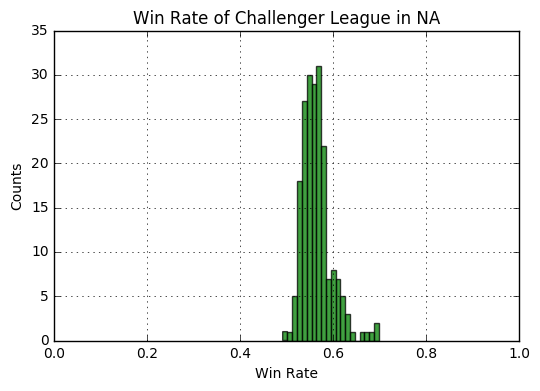

In [11]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# get wins and losses number for each player
wins = []
losses = []
entries = league['entries']
for entry in entries:
    wins.append(entry['wins'])
    losses.append(entry['losses'])

# convert to ndarray and compute win rate
wins = np.array(wins, dtype=np.float32)
losses = np.array(losses, dtype=np.float32)

# plot histogram
n, bins, patches = plt.hist(np.divide(wins, wins+losses), 20, facecolor='green', alpha=0.75)
plt.xlabel('Win Rate')
plt.ylabel('Counts')
plt.title('Win Rate of Challenger League in NA')
plt.xlim([0, 1])
plt.grid(True)

plt.show()

Seems most of the challengers have a win rate between 0.5 to 0.6 :)

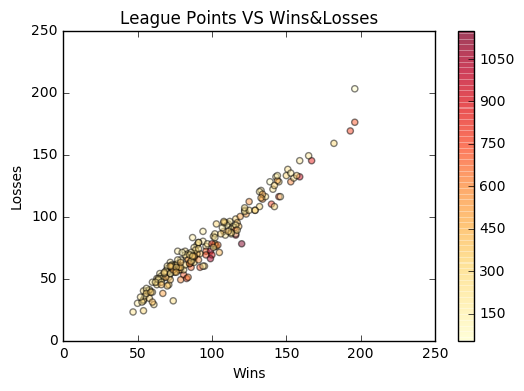

In [15]:
leaguePoints = []
entries = league['entries']
for entry in entries:
    leaguePoints.append(entry['leaguePoints'])
sc = plt.scatter(wins, losses, c=leaguePoints, alpha=0.5, cmap=plt.cm.YlOrRd)
plt.colorbar(sc)
plt.xlabel('Wins')
plt.ylabel('Losses')
plt.title('League Points VS Wins&Losses')

plt.show()

The bubbles lies in diagonal, because those players have a win rate around 0.5  
The lower part bubbles have darker colors, which means higher win rate corresponds to higher league points  
Let's test if this is true

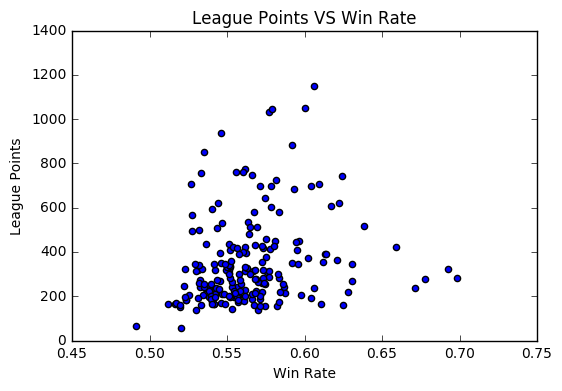

In [17]:
plt.scatter(np.divide(wins, wins+losses), leaguePoints)
plt.xlabel('Win Rate')
plt.ylabel('League Points')
plt.title('League Points VS Win Rate')

plt.show()

The results reveals that league points might be more complicated than I thought :)